We have seen that, given a point (initial condition) on the solution curve of a first-order ODE, we can approximate the rest of the solution curve by eye by following the equation's slope field. Now, let us use Python to achieve numerical approximations of the solutions of first-order initial value problems (which are far more accurate than anything we could draw by eye).

# Euler's method

As before, consider the equation
\begin{align}
    \frac{dy}{dx} &= f(x,y) \label{eq1}\tag{1}.
\end{align}
Suppose we know that $(x_0,y_0)$ is a point (given by some initial condition) on the desired solution curve. Then, if we approximate the curve by a straight line passing through $(x_0,y_0)$ and with slope $f(x_0,y_0)$, we can take a small "step" of size $h$ in the $x$-direction and arrive at the nearby point
$$
    (x_1,y_1) = (x_0+h,y_0+f(x_0,y_0)h)
$$
on the same line. If the step size $h$ is sufficiently small, we have that $y_1\approx y(x_1)$, where $x_1=x_0+h$ and $y(x)$ is the desired solution of (1) satisfying $y(x_0)=y_0$. Continuing in this way, we can produce a sequence of points
\begin{align*}
    (x_1,y_1) &= (x_0+h,y_0+f(x_0,y_0)h) \\
    (x_2,y_2) &= (x_1+h,y_1+f(x_1,y_1)h) \\
    (x_3,y_3) &= (x_2+h,y_2+f(x_2,y_2)h) \\
    &\vdots
\end{align*}
which approximate the solution curve.

# Accuracy of numerical approximations

In general, good approximations using Euler's method require a very small step size $h$. For this reason, there exist more sophisticated numerical approximation techniques such as the *Runge-Kutta method*. Indeed, the Runge-Kutta method (which we will not describe here) is one of the methods used by the ``scipy.integrate.odeint`` function from the ``scipy`` package.

Given a list of $x$-values ``x``, a function ``f``$ =y'=f(y, x)$ (note the order of the arguments) and an initial condition ``y0`` $=y(x_0)$, ``odeint(f, y0, x)`` returns a list of $y$-values which approximate the true values $y(x_i)$ for each $x_i\in$ ``x``, where $y(x)$ is the particular solution satisfying the initial condition.

Below, we compare the accuracies of Euler's method and ``odeint`` for the simple equation $y'=y$. Do you notice how Euler's method can lead to cumulative errors?

**Example 9.1** Find a sequence of points $(x_i,y_i)$ which approximate the solution to the initial value problem
$$
    \frac{dy}{dx}=y, \hspace{10mm} y(0)=1
$$
on the interval $[0, 1.5]$.

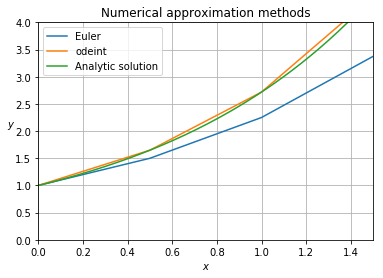

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
%matplotlib inline

def f(y, x): # odeint expects the dependent variable as the first argument
    return y

y0 = 1

x_range = (0, 1.5)
y_range = (0, 4)

#fig, ax = plt.subplots()
#ax.set_aspect('equal')
plt.title('Numerical approximation methods')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$').set_rotation(0) # prevents vertical text

# approximation using Euler's method
h = 0.5
x = np.arange(x_range[0], x_range[1] + h, h) # arange returns a half-open interval
y = [1, 1.5, 2.25, 3.375] # check these values are correct for Euler's method
plt.plot(x, y, label='Euler')

# approximation using odeint
h = 0.5
x = np.arange(x_range[0], x_range[1] + h, h)
y = odeint(f, y0, x)
plt.plot(x, y, label='odeint')

# analytic solution
h = 0.01
x = np.arange(x_range[0], x_range[1] + h, h)
y = np.exp(x)
plt.plot(x, y, label='Analytic solution')

plt.xlim(x_range)
plt.ylim(y_range)
plt.legend()

plt.show()